<a href="https://colab.research.google.com/github/JuhiNayak/Machine-Learning/blob/master/Housing_SalesPrice_Prophet_JuhiNayak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Facebook Prophet** is a procedure for forecasting time series data based on an additive model where nonlinear
trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works
best with time series that have strong seasonal effects and several seasons of historical data.
Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.


I am Applying Facebook Prophet on Additional dataset that has average sales price for various ciies for the year 2020 to forecast the sales price of the property in the upcoming years.

# Import Libraries

In [ ]:
! pip install fbprophet

In [ ]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext google.colab.data_table

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls ./drive/My\ Drive/Midterm\ Numeric\ Test/

Mounted at /content/drive
'Additional Data'
 Copy_SanDiegoHousing-DatSet_Pankaj.csv
 NewScrapedData
'SanDiegoHousing-DatSet (1).gsheet'
'SanDiegoHousing-DatSet (2).gsheet'
'SanDiegoHousing-DatSet (3).gsheet'
'SanDiegoHousing-DatSet (4).gsheet'
'SanDiegoHousing-DatSet (5).gsheet'
'SanDiegoHousing-DatSet (6).gsheet'
 SanDiegoHousing-DatSet.csv
 SanDiegoHousing-DatSet.gsheet
'SanDiego Housing Midterm Test Oct 2020.gdoc'


In [ ]:
!ls ./drive/My\ Drive/Midterm\ Numeric\ Test/Additional\ Data

'Average Sales Price-Logan Heights Imperial Beach Mission Hills Mission Valley-20180905 (1).gsheet'
'Average Sales Price-Logan Heights Imperial Beach Mission Hills Mission Valley-20180905 (2).gsheet'
'Average Sales Price-Logan Heights Imperial Beach Mission Hills Mission Valley-20180905 (3).gsheet'
'Average Sales Price-Logan Heights Imperial Beach Mission Hills Mission Valley-20180905.csv'
'Average Sales Price-Logan Heights Imperial Beach Mission Hills Mission Valley-20180905.gsheet'
'Average Sales Price-Logan Heights Imperial Beach Mission Hills Mission Valley-20180905-ts.csv'
'Average Sales Price-Mira Mesa San Carlos Santee La Mesa-20180905.csv'
'Average Sales Price-Mira Mesa San Carlos Santee La Mesa-20180905.gsheet'
'Average Sales Price-Mira Mesa San Carlos Santee La Mesa-20180905-ts.csv'
'Average Sales Price-North Park Hillcrest University Heights Old Town-20180905 (1).gsheet'
'Average Sales Price-North Park Hillcrest University Heights Old Town-20180905.csv'
'Average Sales Price-

In [ ]:
path = "/content/drive/My Drive/Midterm Numeric Test/Additional Data/Average Sales Price-Oceanside Carlsbad South Encinitas Solana Beach-20180905-ts.csv"
path1 = '/content/drive/My Drive/Midterm Numeric Test/Additional Data/Average Sales Price-Oceanside La Jolla Pacific Beach Mission Beach-20180905-ts.csv'
path2 = '/content/drive/My Drive/Midterm Numeric Test/Additional Data/Average Sales Price-Mira Mesa San Carlos Santee La Mesa-20180905-ts.csv'
path3 = '/content/drive/My Drive/Midterm Numeric Test/Additional Data/Average Sales Price-San Marcos Vista Lake San Marcos Fallbrook-20180905-ts.csv'
path4 = '/content/drive/My Drive/Midterm Numeric Test/Additional Data/Average Sales Price-Oceanside Downtown Clairemont Bay Park-20180905-ts.csv'
path5 = '/content/drive/My Drive/Midterm Numeric Test/Additional Data/Average Sales Price-North Park Hillcrest University Heights Old Town-20180905-ts.csv'
path6 = '/content/drive/My Drive/Midterm Numeric Test/Additional Data/Average Sales Price-Rancho Bernardo Rancho Penasquitos Poway Scripps Ranch-20180905-ts.csv'
path7 = '/content/drive/My Drive/Midterm Numeric Test/Additional Data/Average Sales Price-Logan Heights Imperial Beach Mission Hills Mission Valley-20180905-ts.csv'
df_prof = pd.read_csv(path)
df_prof1 = pd.read_csv(path1)
df_prof1.drop(['Oceanside'], axis = 1, inplace=True)

df_prof2 = pd.read_csv(path2)
df_prof3 = pd.read_csv(path3)
df_prof4 = pd.read_csv(path4)
df_prof4.drop(['Oceanside', 'Downtown'], inplace=True, axis = 1)
df_prof5 = pd.read_csv(path5)
df_prof6 = pd.read_csv(path6)
df_prof7 = pd.read_csv(path7)

newdf = df_prof.merge(df_prof1, on='Date', how='left')
newdf1 = df_prof2.merge(newdf, on='Date', how='left')
new1 = df_prof3.merge(newdf1, on='Date', how='left')
new2 = df_prof4.merge(new1, on='Date', how='left')
new3 = df_prof5.merge(new2, on='Date', how='left')
new4 = df_prof6.merge(new3, on='Date', how='left')
new = df_prof7.merge(new4, on='Date', how='left')
new.head(5)

,Date,Logan Heights,Imperial Beach,Mission Hills,Mission Valley,Rancho Bernardo,Rancho Penasquitos,Poway,Scripps Ranch,North Park,Hillcrest,University Heights,Old Town,Clairemont,Bay Park,San Marcos,Vista,Lake San Marcos,Fallbrook,Mira Mesa,San Carlos,Santee,La Mesa,Oceanside,Carlsbad South,Encinitas,Solana Beach,La Jolla,Pacific Beach,Mission Beach
0,2020-01-04,249634.0,392660.0,581678.0,290625.0,427314.0,421648.0,591547.0,502004.0,339174.0,399630.0,360976.0,365838.0,386480.0,516231.0,368284.0,354900.0,376130.0,446350.0,337352.0,363457.0,299773.0,360502.0,343644.0,520410.0,624517.0,688178.0,1041792.0,511628.0,764197.0
1,2020-02-04,254732.0,396370.0,587827.0,293315.0,430550.0,426340.0,611702.0,508178.0,336599.0,393673.0,359321.0,365838.0,390349.0,530252.0,370635.0,359455.0,381183.0,457641.0,339735.0,367784.0,303084.0,365732.0,347908.0,521824.0,635285.0,708944.0,1023623.0,524954.0,808826.0
2,2020-03-04,257309.0,404544.0,596196.0,301396.0,439585.0,438752.0,633924.0,520800.0,343145.0,394296.0,359281.0,375856.0,397675.0,537255.0,377909.0,366696.0,380673.0,466582.0,343617.0,372298.0,307406.0,370264.0,354742.0,530114.0,639778.0,721270.0,1040822.0,534297.0,777960.0
3,2020-04-04,269281.0,422106.0,646806.0,309597.0,450077.0,449172.0,665040.0,528194.0,354958.0,388064.0,370353.0,382064.0,409980.0,546959.0,391593.0,378359.0,393797.0,483144.0,350507.0,385166.0,311946.0,378820.0,364090.0,541371.0,661516.0,755938.0,1062020.0,543272.0,773904.0
4,2020-05-04,274899.0,439246.0,653416.0,321087.0,460746.0,464534.0,676076.0,535685.0,363094.0,397239.0,391575.0,373750.0,415585.0,552550.0,400248.0,387808.0,414121.0,495899.0,359000.0,394594.0,318158.0,389642.0,371463.0,548449.0,679647.0,761735.0,1118685.0,559512.0,841964.0


# Applying prophet for first 7 properties

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

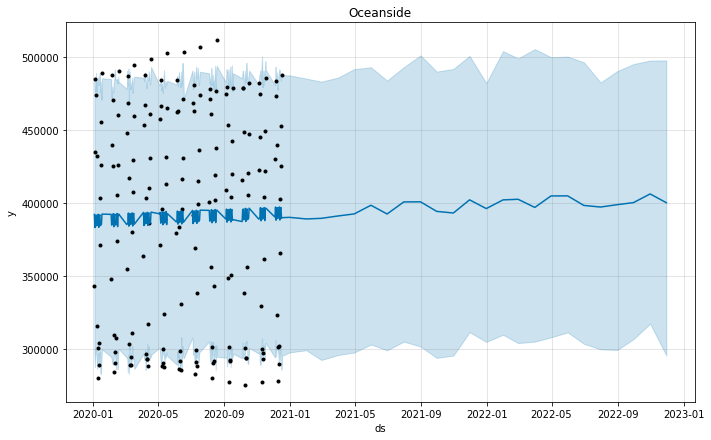

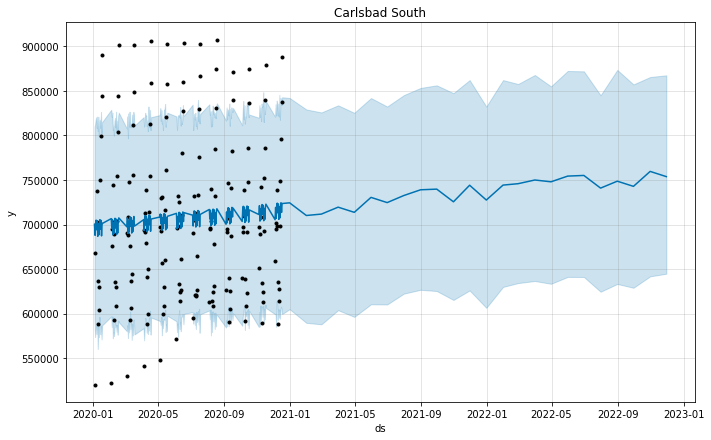

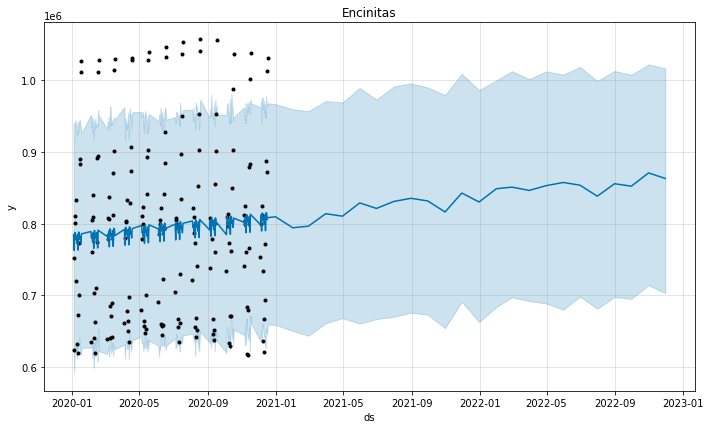

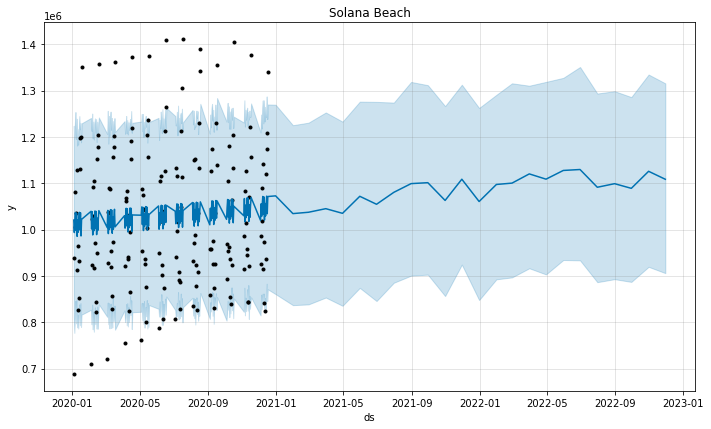

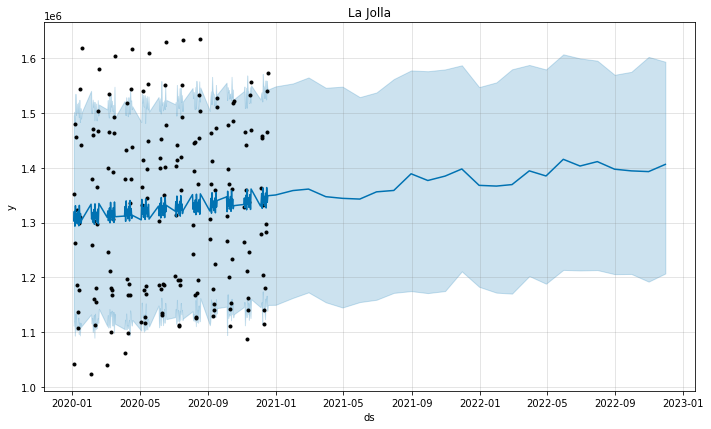

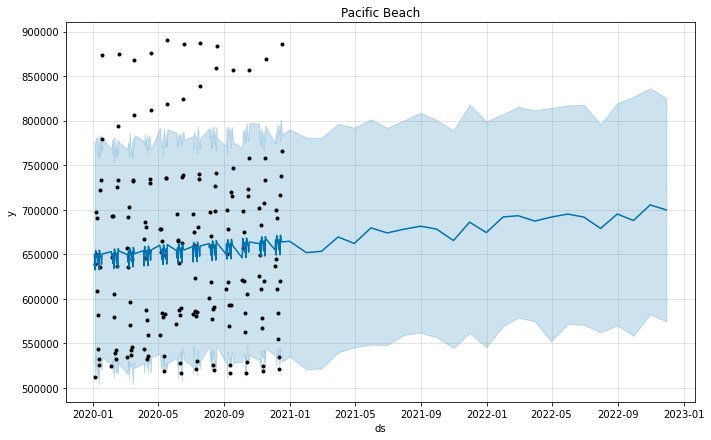

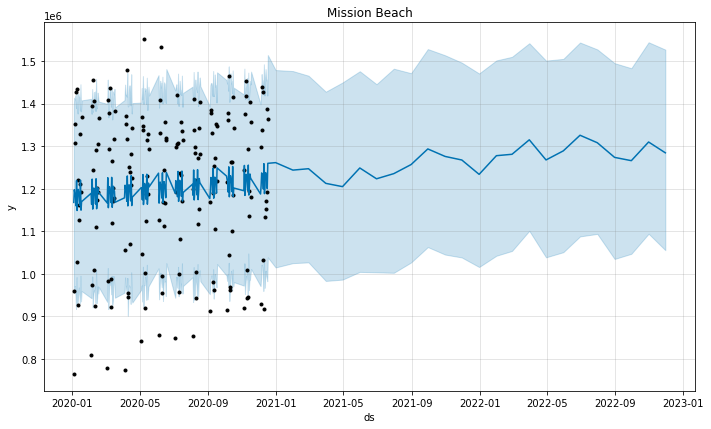

In [ ]:

cols = ['Oceanside','Carlsbad South','Encinitas','Solana Beach', 'La Jolla', 'Pacific Beach', 'Mission Beach']
results = []
for col in cols:
    cityname = col
    subdf = new[['Date', col]].dropna()
    subdf = subdf.rename(columns={'Date':'ds', col:'y'})
    m = Prophet()
    m.fit(subdf)
    result = m.predict(m.make_future_dataframe(periods=24, freq = 'm'))
    m.plot(result)
    plt.title(cityname)
    results.append(result)
new.predict = pd.concat(results, axis=1)
new.predict.to_csv('predict_file.csv')

Amoung all these bacth of cities, I found that the prices for the property at '***Oceanside***' has the least increment for the next 2 years whereas properties at '***Encinitas***' are best to invest on as per the prediction, as it has the highest increment in the price for the upcoming 2 years.  

# Applying prophet for next 8 properties

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

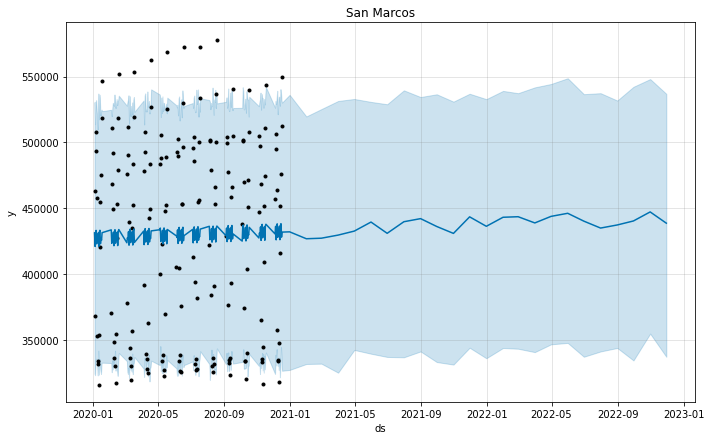

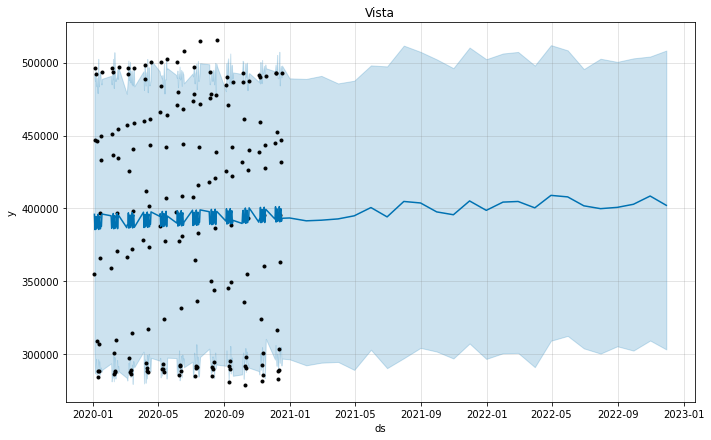

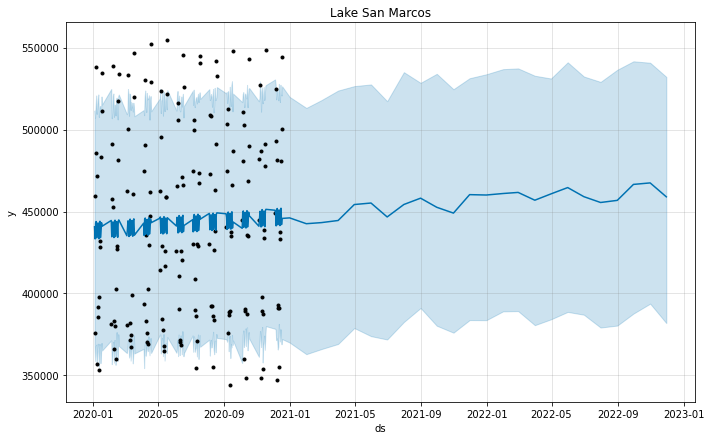

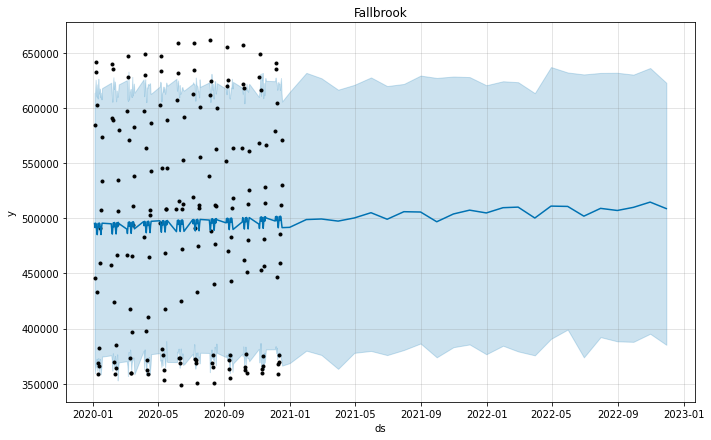

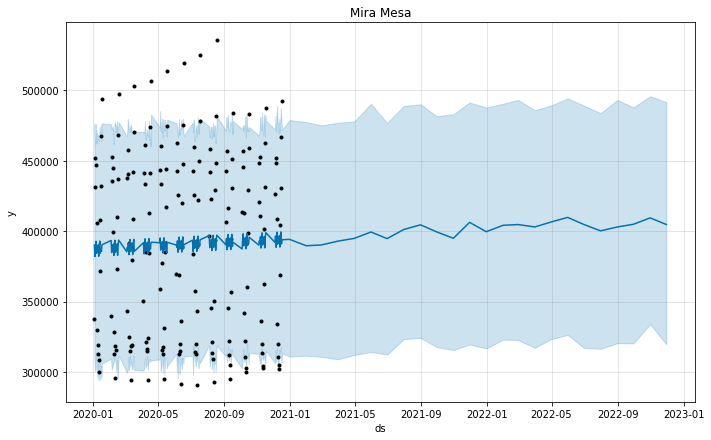

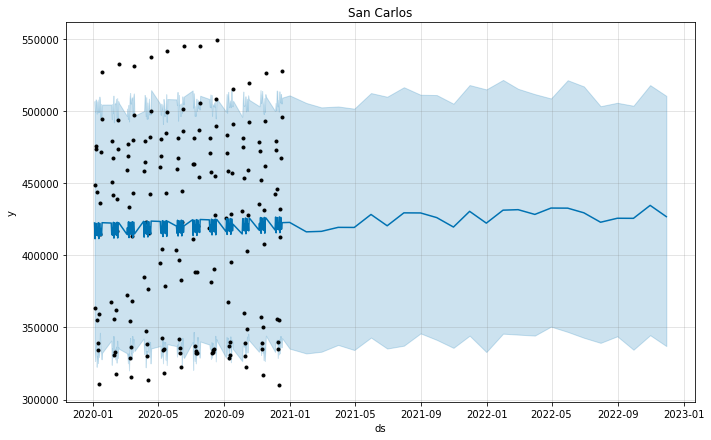

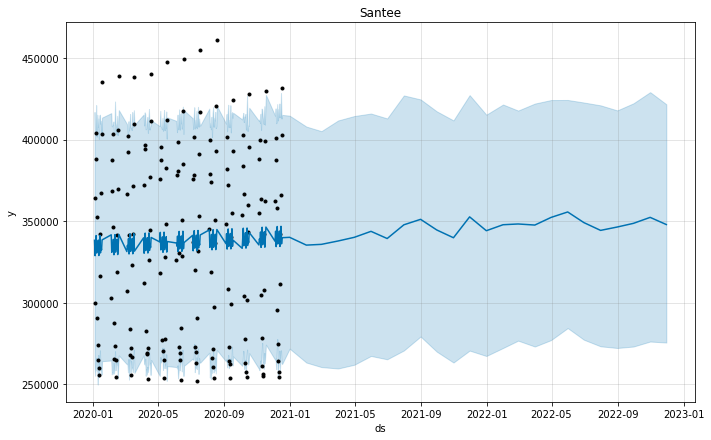

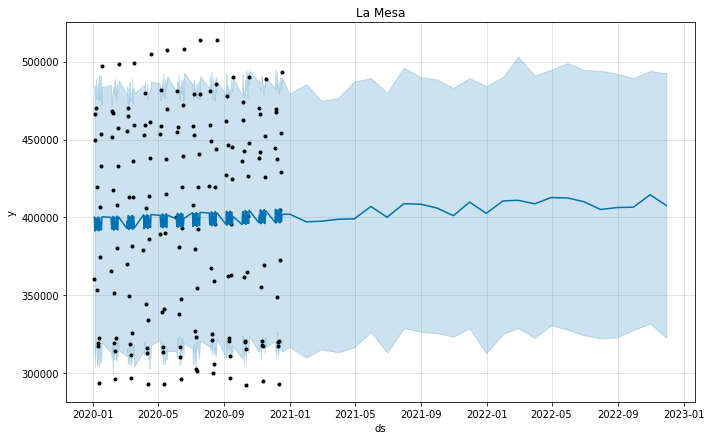

In [ ]:

cols = ['San Marcos','Vista','Lake San Marcos',	'Fallbrook',	'Mira Mesa','San Carlos','Santee','La Mesa']
results = []
for col in cols:
    cityname = col
    subdf = new[['Date', col]].dropna()
    subdf = subdf.rename(columns={'Date':'ds', col:'y'})
    m = Prophet()
    m.fit(subdf)
    result = m.predict(m.make_future_dataframe(periods=24, freq = 'm'))
    m.plot(result)
    plt.title(cityname)
    results.append(result)
new.predict = pd.concat(results, axis=1)
new.predict.to_csv('predict_file.csv')

The properties at this batch of cities is not suggested for the investement because the prices are consistent and has very low increment in the selling prices for the next two years.

# Applying prophet for next 6 properties

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

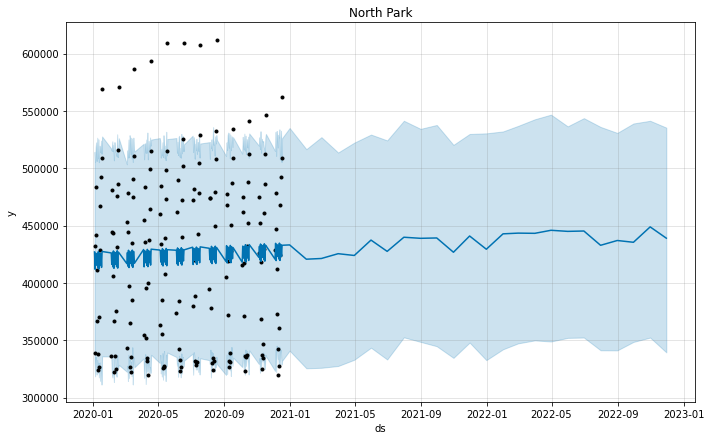

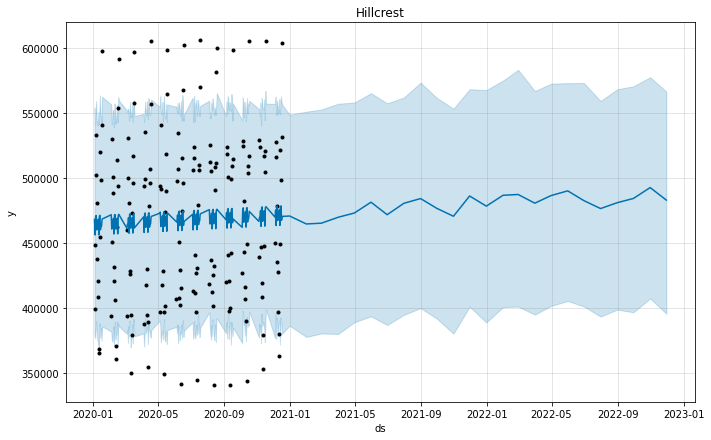

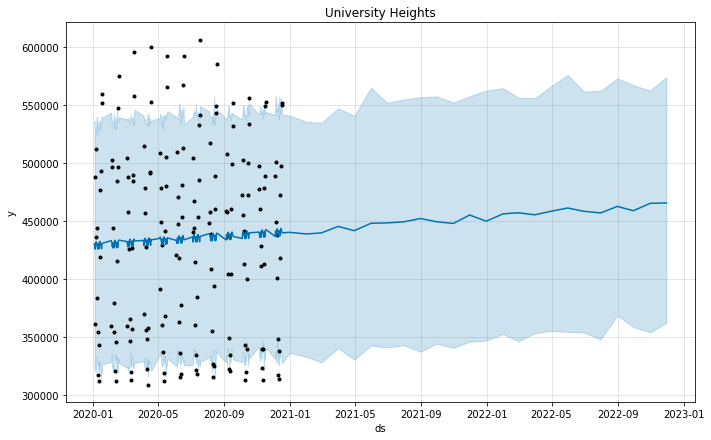

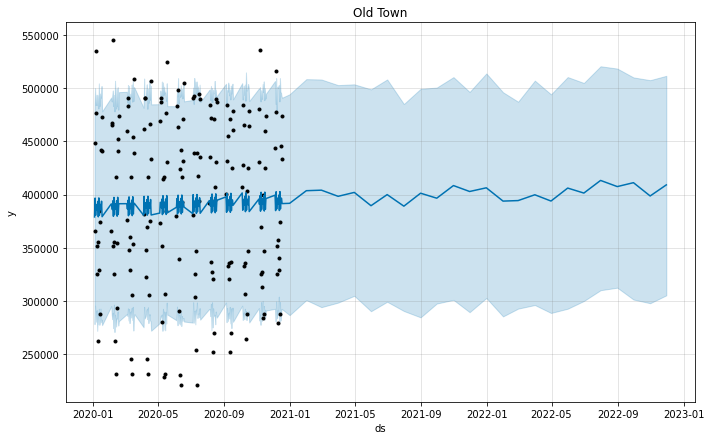

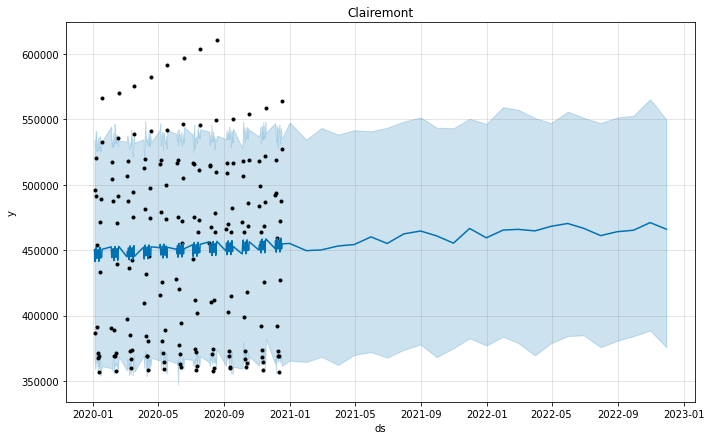

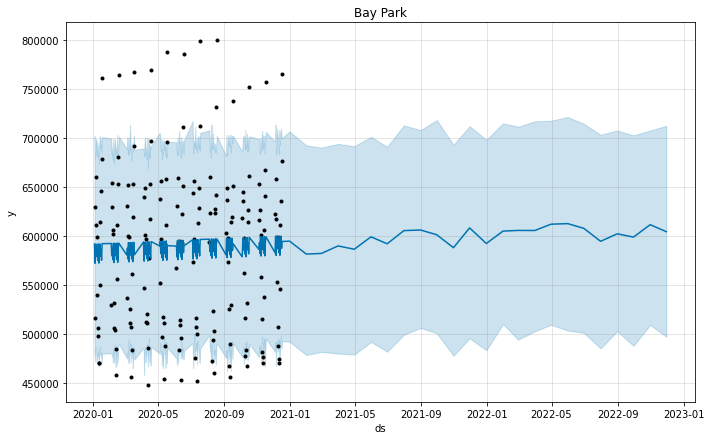

In [ ]:

cols = ['North Park','Hillcrest','University Heights','Old Town', 'Clairemont', 'Bay Park']
results = []
for col in cols:
    cityname = col
    subdf = new[['Date', col]].dropna()
    subdf = subdf.rename(columns={'Date':'ds', col:'y'})
    m = Prophet()
    m.fit(subdf)
    result = m.predict(m.make_future_dataframe(periods=24, freq = 'm'))
    m.plot(result)
    plt.title(cityname)
    results.append(result)
new.predict = pd.concat(results, axis=1)
new.predict.to_csv('predict_file.csv')

Among this batch of cities, ***University Heights*** has the consistent increment in the selling prices so can be a good option for the investment. Whereas rest all the cities has negligible increment in the selling price that may not be ideal for an investment, considering a price forecasting for the next two years.

# Applying prophet for next 8 properties

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

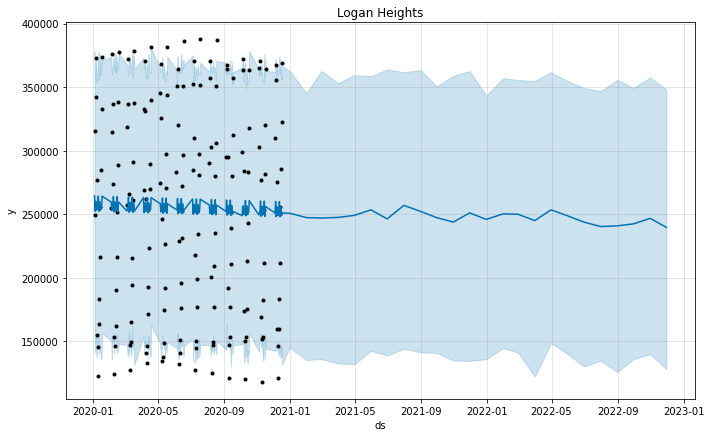

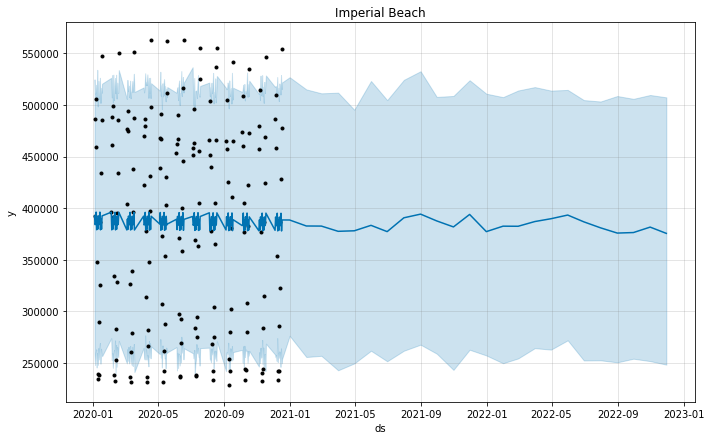

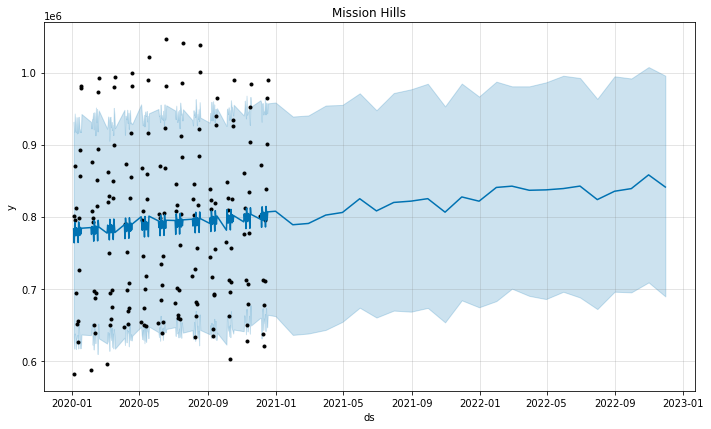

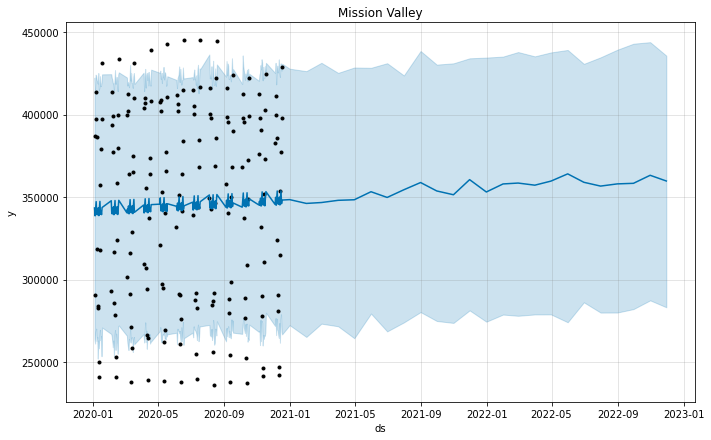

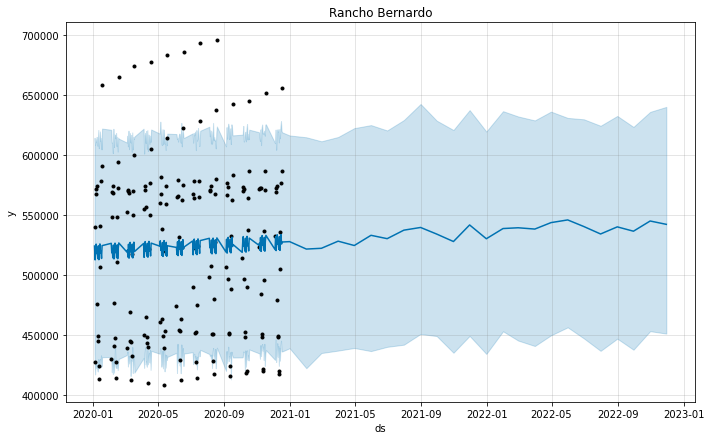

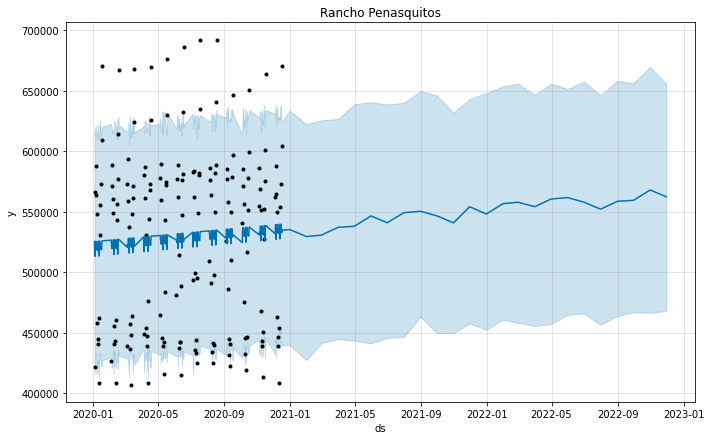

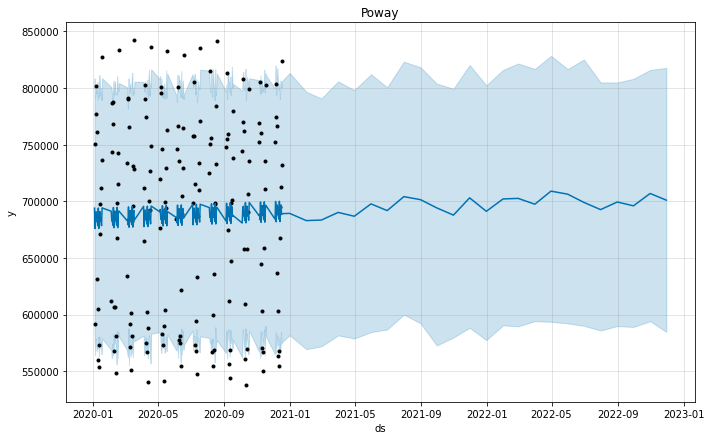

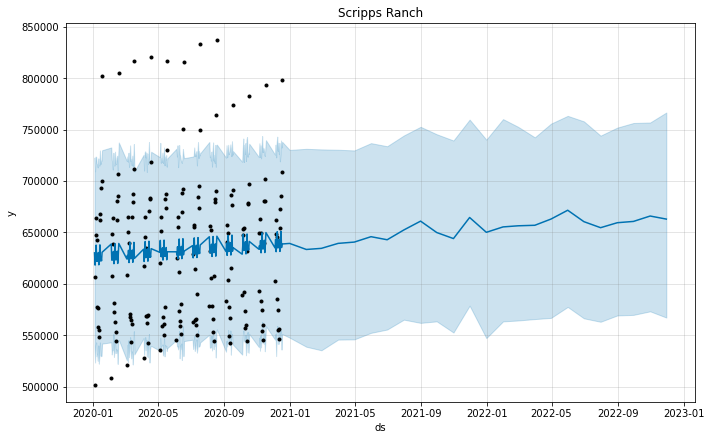

In [ ]:

cols = ['Logan Heights','Imperial Beach','Mission Hills','Mission Valley', 'Rancho Bernardo', 'Rancho Penasquitos', 'Poway','Scripps Ranch']
results = []
for col in cols:
    cityname = col
    subdf = new[['Date', col]].dropna()
    subdf = subdf.rename(columns={'Date':'ds', col:'y'})
    m = Prophet()
    m.fit(subdf)
    result = m.predict(m.make_future_dataframe(periods=24, freq = 'm'))
    m.plot(result)
    plt.title(cityname)
    results.append(result)
new.predict = pd.concat(results, axis=1)
new.predict.to_csv('predict_file.csv')

Among this batch of the cities, '***Loagn heights***' and '***Imperial Beach***' are not suggested options for an investment as there is decrement in the selling prices as per the forecasting. Whereas, the properties '***Rancho Penasquitos***' and '***Mission Hills***' has significant increment in the selling prices and suggested for investment. 